## k-Nearest Neighbours: Classification

<img src='https://onlinecourses.science.psu.edu/stat857/sites/onlinecourses.science.psu.edu.stat857/files/lesson12/image_07.gif'>

``k-Nearest Neighbours (KNN)`` falls in the **supervised learning** family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations $(x,y)$ and would like to capture the relationship between $x$ and $y$. More formally, our goal is to learn a function $h: X \rightarrow Y$ so that given an unseen observation $x$, $h(x)$ can confidently predict the corresponding output $y$.


## Algorithm

 <img src='../images/knn2.jpg'>

### Import required modules and load data file

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table('../data/fruit_data_with_colors.txt')

In [15]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [16]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

The file contains the mass, height, and width of a selection of oranges, lemons and apples. The heights were measured along the core of the fruit. The widths were the widest width perpendicular to the height.

### Examining the data

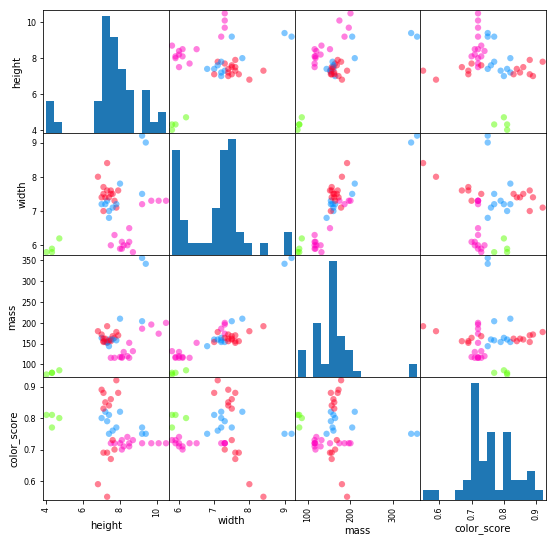

In [17]:
# plotting a scatter matrix
from matplotlib import cm

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gist_rainbow')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

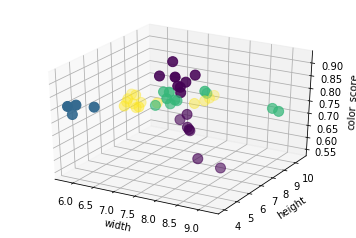

In [18]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

### Create train-test split

In [19]:
# For this example, we use the mass, width, and height features of each fruit instance
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Create classifier object

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

### Train the classifier (fit the estimator) using the training data

In [21]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Estimate the accuracy of the classifier on future data, using the test data

In [22]:
knn.score(X_test, y_test)

0.5333333333333333

### Use the trained k-NN classifier model to classify new, previously unseen objects

In [23]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [24]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

### Plot the decision boundaries of the k-NN classifier

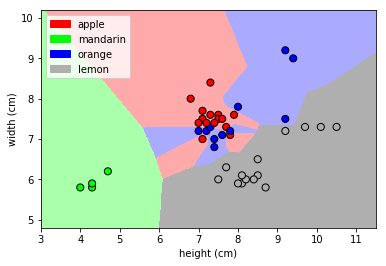

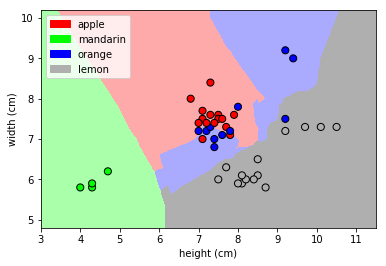

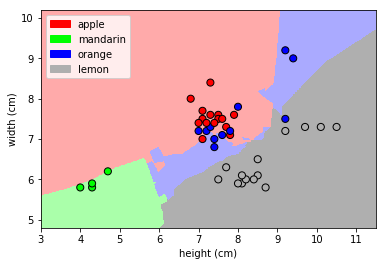

In [25]:
from ubaru.adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 1, 'uniform')  # nearest neighbors = 1
plot_fruit_knn(X_train, y_train, 5, 'uniform')  # nearest neighbors = 5
plot_fruit_knn(X_train, y_train, 10, 'uniform');# nearest neighbors = 10

### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

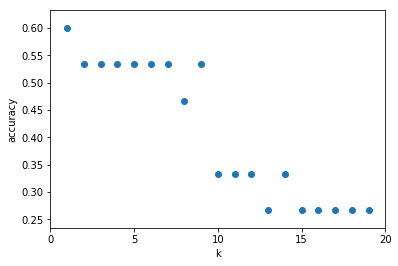

In [26]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

### How sensitive is k-NN classification accuracy to the train/test split proportion?

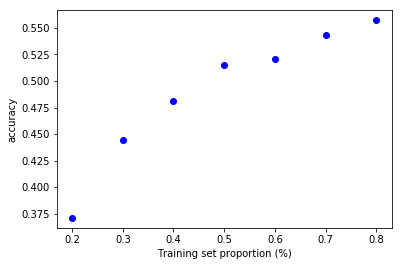

In [27]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

### Pros and Cons of KNN

**Pros**

As you can already tell from the previous section, one of the most attractive features of the K-nearest neighbor algorithm is that is simple to understand and easy to implement. With zero to little training time, it can be a useful tool for off-the-bat analysis of some data set you are planning to run more complex algorithms on. Furthermore, KNN works just as easily with multiclass data sets whereas other algorithms are hardcoded for the binary setting. Finally, as we mentioned earlier, the non-parametric nature of KNN gives it an edge in certain settings where the data may be highly “unusual”.

**Cons**

One of the obvious drawbacks of the KNN algorithm is the computationally expensive testing phase which is impractical in industry settings. Note the rigid dichotomy between KNN and the more sophisticated Neural Network which has a lengthy training phase albeit a very fast testing phase. Furthermore, KNN can suffer from skewed class distributions. For example, if a certain class is very frequent in the training set, it will tend to dominate the majority voting of the new example (large number = more common). Finally, the accuracy of KNN can be severely degraded with high-dimension data because there is little difference between the nearest and farthest neighbor.

**Improvements**

With that being said, there are many ways in which the KNN algorithm can be improved.

- A simple and effective way to remedy skewed class distributions is by implementing **weighed voting**. The class of each of the K neighbors is multiplied by a weight proportional to the inverse of the distance from that point to the given test point. This ensures that nearer neighbors contribute more to the final vote than the more distant ones.
- **Changing the distance metric** for different applications may help improve the accuracy of the algorithm. (i.e. Hamming distance for text classification)
- **Rescaling your data** makes the distance metric more meaningful. For instance, given 2 features $height$ and $weight$, an observation such as $x=[180,70]$ will clearly skew the distance metric in favor of height. One way of fixing this is by column-wise subtracting the mean and dividing by the standard deviation. Scikit-learn’s normalize() method can come in handy.
- **Dimensionality reduction** techniques like PCA should be executed prior to appplying KNN and help make the distance metric more meaningful.
- **Approximate Nearest Neighbor** techniques such as using k-d trees to store the training observations can be leveraged to decrease testing time. Note however that these methods tend to perform poorly in high dimensions (20+).

## Exercise 1

Load the ``iris dataset`` from ``sklearn.datasets``

Perform the following tasks:
- select two features i.e. sepal_length and sepal_width for k-nearest neighbours (KNN)
- create an instance of Neighbours Classifier and fit the data.clustering

## Exercise 2

Read the Wine Quality White dataset (``winequality-white.csv``) from your data folder.

Perform the follwong tasks:
- select features to be the first 11 columns while the last column to be the target
- plot the pair plot for all features
- separate the data to 80:20 training and testing datasets
- create an instance of Neighbours Classifier and fit the data
- Measure the accurary and Root Mean Square Error (RMSE) for the fitted model
- Perform grid search to find the best parameters for KNN, for ``weights: ['uniform', 'distance']``, ``n_neighbors: [40, 60, 80, 100, 120, 140]``




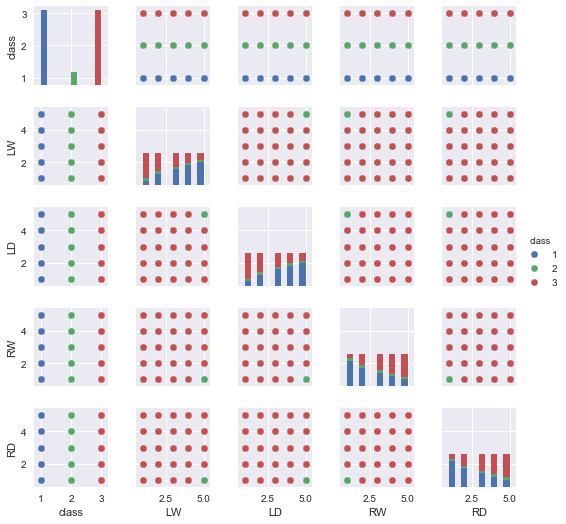

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

import pandas as pd

df1 = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data',
                    header=None,
                    sep=",", 
                    names=['class','LW','LD','RW','RD'])
df1['class'].replace(['L'], 1, inplace=True)
df1['class'].replace(['B'], 2, inplace=True)
df1['class'].replace(['R'], 3, inplace=True)

%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(df1, hue='class', size=1.5);

df1.head()

X = df1[list(df1.columns)[1:]]
y = df1['class']

#print(X)
#print(y)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size=0.8)

knnmodel = KNeighborsClassifier()
knnmodel.fit(X_train, y_train)
y_predict = knnmodel.predict(X_test)

print('Score:', knnmodel.score(X_test, y_test))
print ('RMSE:', mean_squared_error(y_predict, y_test) ** 0.5)

parameters = [{'weights': ['uniform', 'distance'], 'n_neighbors': [40, 60, 80, 100, 120, 140]}]
grid = GridSearchCV(knnmodel, parameters)
grid.fit(X_train, y_train)
print(grid)

print(grid.best_score_)
print(grid.best_estimator_.weights)
print(grid.best_estimator_.n_neighbors)

C:\Users\A1825\AppData\Local\Continuum\anaconda3\envs\ubaru\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Score: 0.824
RMSE: 0.6633249580710799
GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'weights': ['uniform', 'distance'], 'n_neighbors': [40, 60, 80, 100, 120, 140]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
0.902
distance
120


Score: 0.5004081632653061
RMSE: 0.9549014266896231
GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'weights': ['uniform', 'distance'], 'n_neighbors': [40, 60, 80, 100, 120, 140]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
0.5673836101279608
distance
100


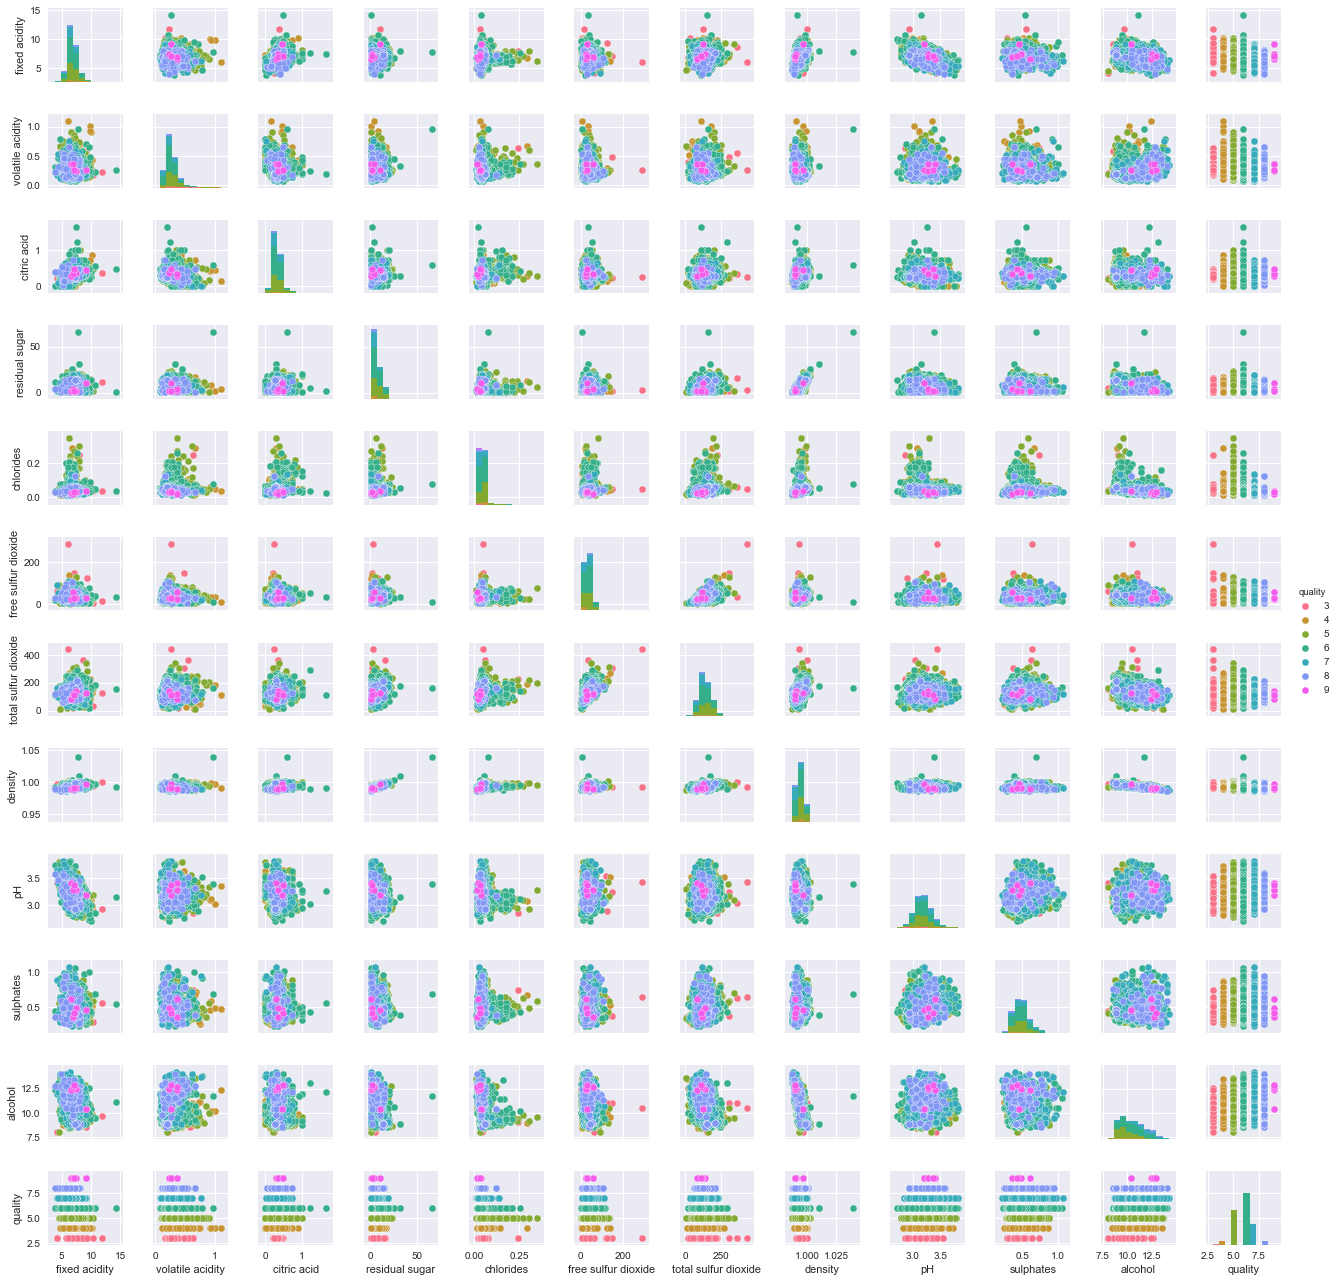

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

import pandas as pd

df = pd.read_csv('../data/winequality-white.csv')

%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(df, hue='quality', size=1.5);


X = df[list(df.columns)[:-1]]
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print('Score:', model.score(X_test, y_test))
print ('RMSE:', mean_squared_error(y_predict, y_test) ** 0.5)

parameters = [{'weights': ['uniform', 'distance'], 'n_neighbors': [40, 60, 80, 100, 120, 140]}]
grid = GridSearchCV(model, parameters)
grid.fit(X_train, y_train)
print(grid)

print(grid.best_score_)
print(grid.best_estimator_.weights)
print(grid.best_estimator_.n_neighbors)